In [39]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, img_to_array
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.regularizers import l1, l2, l1_l2

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets.fashion_mnist import load_data

In [7]:
(X_train, y_train), (X_test, y_test) = load_data()

In [8]:
y_trainOne = to_categorical(y_train)

In [9]:
y_trainOne = to_categorical(y_train)

In [16]:
X_trainR = X_train.reshape(-1,28,28,1)

In [18]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), strides=1, input_shape=(28,28,1),
                 activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add( MaxPool2D( pool_size=(2,2 ) ) )
model.add( Flatten()) 
model.add( Dense( units=64, activation='relu'))
model.add( Dense( units=10, activation='softmax'))
model.compile( loss='categorical_crossentropy', optimizer='adam', 
              metrics=['acc'] )
h = model.fit( X_trainR, y_trainOne, epochs= 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 69s 45ms/step - loss: 0.6077 - acc: 0.8577 - val_loss: 0.3236 - val_acc: 0.8814
Epoch 2/5
1500/1500 [==============================] - 69s 46ms/step - loss: 0.2703 - acc: 0.9001 - val_loss: 0.2961 - val_acc: 0.8919
Epoch 3/5
1500/1500 [==============================] - 69s 46ms/step - loss: 0.2199 - acc: 0.9169 - val_loss: 0.3078 - val_acc: 0.8948
Epoch 4/5
1500/1500 [==============================] - 69s 46ms/step - loss: 0.1853 - acc: 0.9304 - val_loss: 0.2994 - val_acc: 0.8966
Epoch 5/5
1500/1500 [==============================] - 67s 45ms/step - loss: 0.1609 - acc: 0.9391 - val_loss: 0.3425 - val_acc: 0.8975


In [19]:
h.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

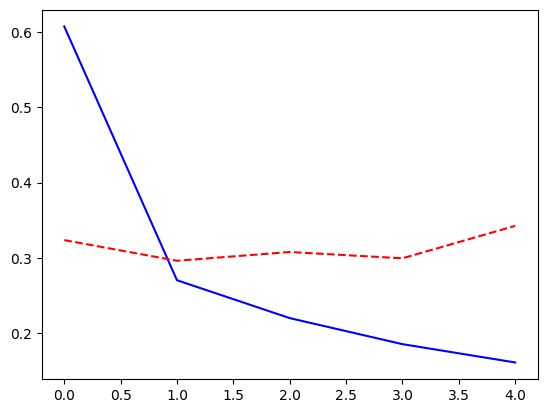

In [20]:
plt.plot(h.history['loss'], 'b-')
plt.plot(h.history['val_loss'], 'r--')
plt.show()

In [40]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), strides=1, input_shape=(28,28,1),
                 activation='relu', padding='same', kernel_regularizer = l2(0.001)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu',kernel_regularizer = l1(0.001)))

model.add( MaxPool2D( pool_size=(2,2 ) ) )

model.add(Dropout(0.2))

model.add( Flatten()) 
model.add( Dense( units=64, activation='relu', kernel_regularizer = l1_l2(0.001)))
model.add( Dense( units=10, activation='softmax'))
model.compile( loss='categorical_crossentropy', optimizer='adam', 
              metrics=['acc'] )
h = model.fit( X_trainR, y_trainOne, epochs= 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 76s 50ms/step - loss: 3.6286 - acc: 0.8283 - val_loss: 1.4109 - val_acc: 0.8602
Epoch 2/5
1500/1500 [==============================] - 80s 53ms/step - loss: 1.1094 - acc: 0.8580 - val_loss: 0.8945 - val_acc: 0.8727
Epoch 3/5
1500/1500 [==============================] - 80s 53ms/step - loss: 0.8215 - acc: 0.8662 - val_loss: 0.7690 - val_acc: 0.8797
Epoch 4/5
1500/1500 [==============================] - 77s 51ms/step - loss: 0.7412 - acc: 0.8690 - val_loss: 0.7243 - val_acc: 0.8827
Epoch 5/5
1500/1500 [==============================] - 82s 55ms/step - loss: 0.7096 - acc: 0.8722 - val_loss: 0.6677 - val_acc: 0.8798


In [41]:
h.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

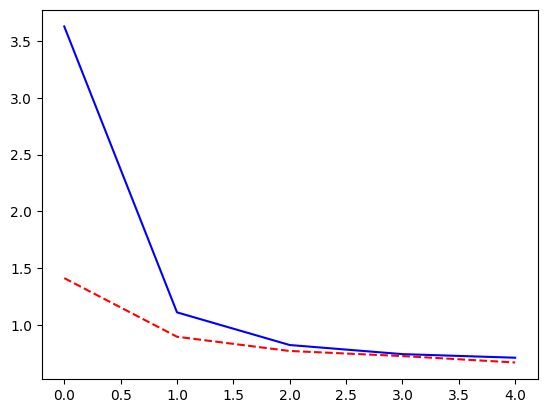

In [42]:
plt.plot(h.history['loss'], 'b-')
plt.plot(h.history['val_loss'], 'r--')
plt.show()